<a href="https://colab.research.google.com/github/Kwasi-Dankwa/teleco-churn-project-ml/blob/main/teleco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING STAGE (LOADING DATA AND EDA)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10) #viewing first 10 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.columns
df.describe() #describing the data for numerical columns


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# customerID is already set as the index
df.set_index('customerID', inplace=True)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [5]:
# understanding dataframe dimensions
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
# checking for null values
df.isnull().sum() # dataset apears to be fully cleaned

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [7]:
#Replace empty strings with NaN for TotalCharges column
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Replace NaN with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [9]:
# transform Churn column into binary format, Yes = 1, No = 0 (Encoding)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1


EXPLORATORY DATA ANALYSIS PHASE

In [10]:
# summary stats for numerical values
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [11]:
# indepth - analysis
df.describe(include='object')

# class distribution
df['Churn'].value_counts(normalize=True) * 100 #distribution percentage/ data is imbalanced

# might have to apply stratified sampling, undersmapling, smote, class weight


,proportion
Churn,
0,73.463013
1,26.536987


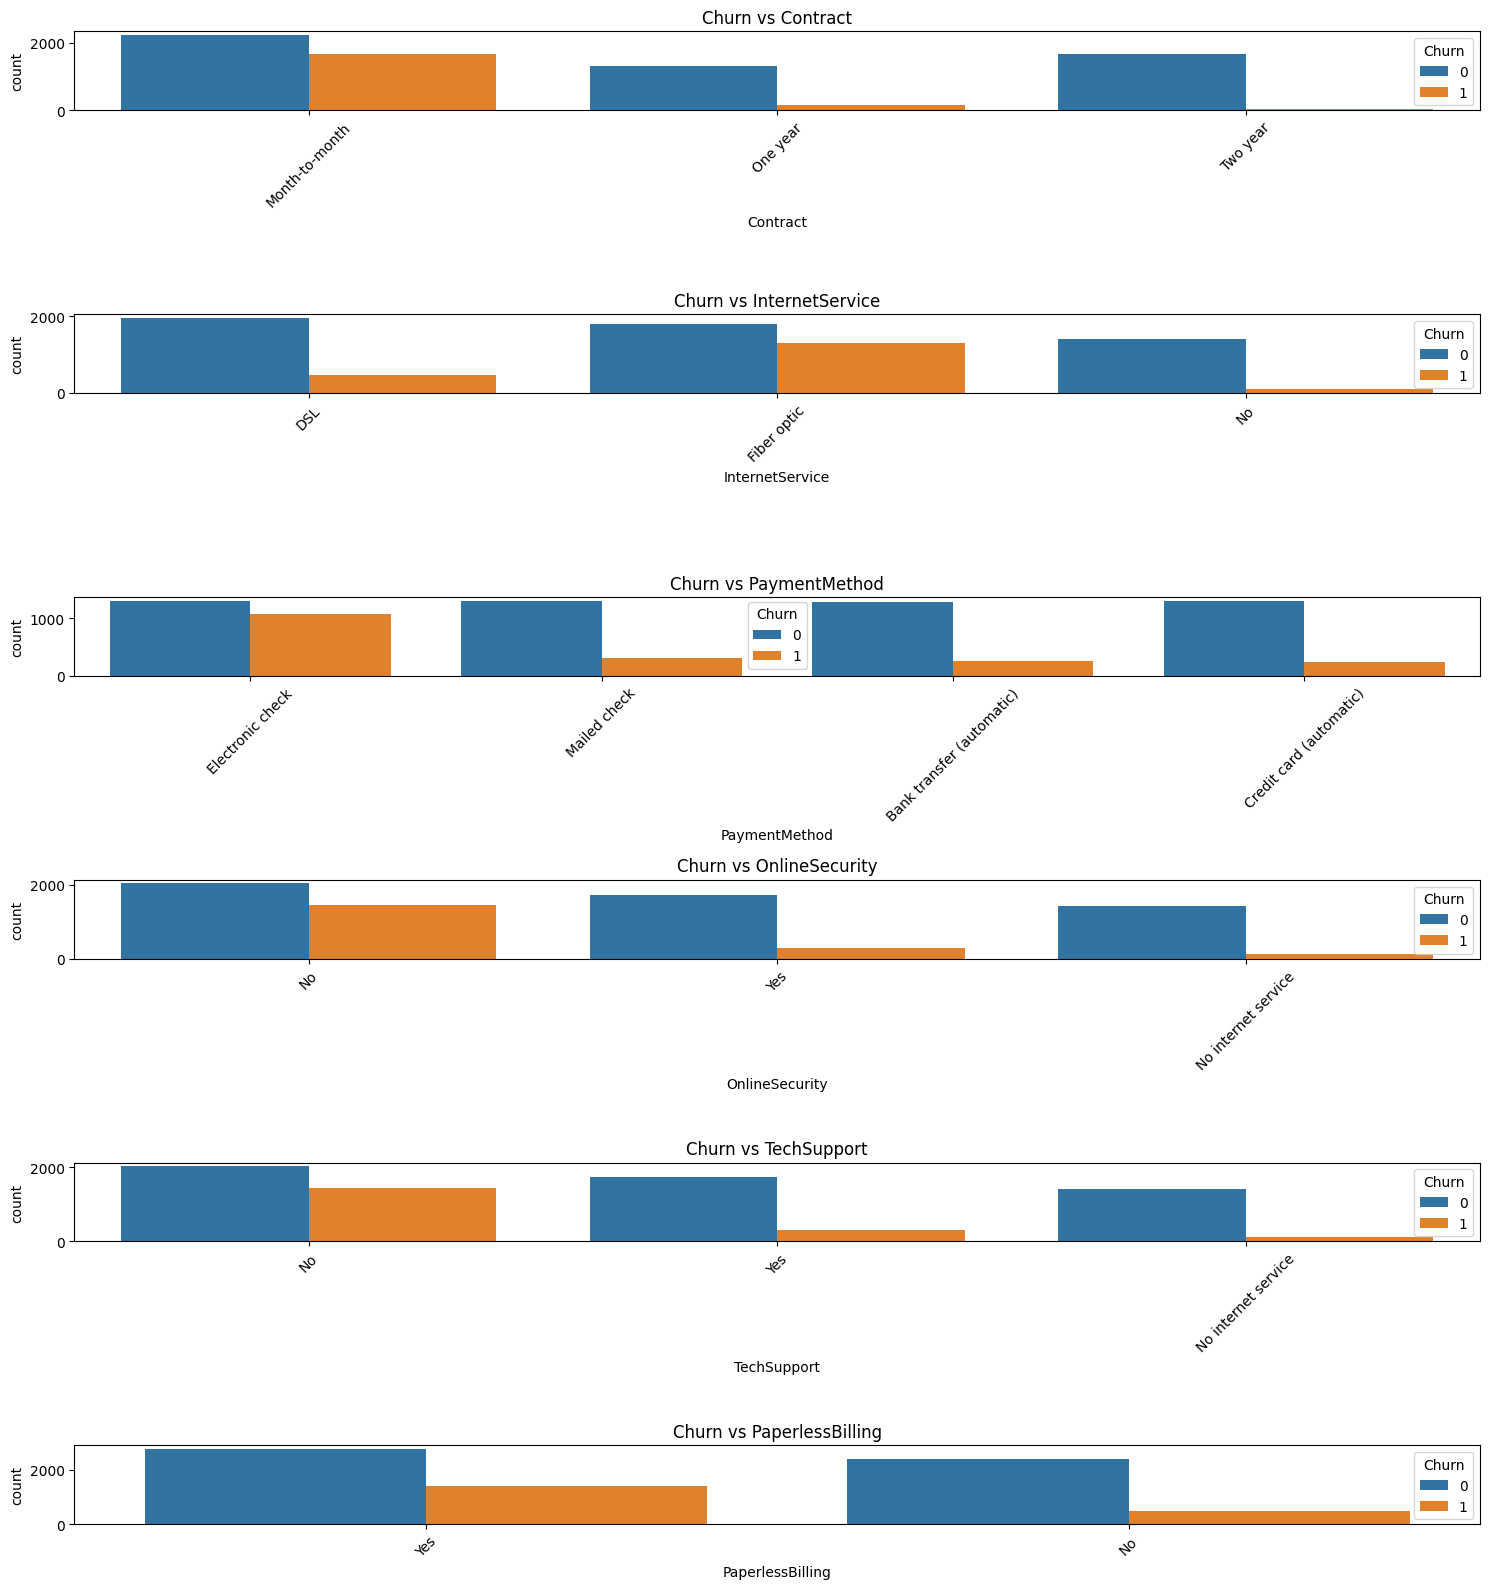

In [12]:
# Visualize categorocial variables vs churn
plt.figure(figsize=(15, 16))
cat_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity'
, 'TechSupport', 'PaperlessBilling']

for i, col in enumerate(cat_features, 1):
  plt.subplot(len(cat_features), 1, i)
  sns.countplot(data=df, x=col, hue='Churn')
  plt.title(f'Churn vs {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
plt.show()

# INSIGHTS

1.Churn vs. Contract Type:

* Observation: Customers on Month-to-month contracts show a significantly higher churn rate compared to those on One-year or Two-year contracts.

* Implication: Shorter contract durations appear to be a major indicator of churn risk. Customers are likely more flexible to switch providers when not bound by long-term commitments.

* Actionable Insight: Consider incentivizing customers to opt for longer-term contracts, perhaps through discounts or exclusive benefits, to improve retention.

2. Churn vs. Internet Service:

* Observation: Customers with Fiber optic internet service exhibit a higher churn rate than those with DSL. Customers with "No internet service" naturally show very low churn, as the churn is typically related to the internet service itself.

* Implication: While Fiber optic is a premium service, it appears to be associated with higher churn. This could suggest issues with service quality, pricing, or competition within the fiber optic market.

* Actionable Insight: Investigate customer satisfaction among fiber optic users. Are there common complaints regarding speed, reliability, or customer support that are driving churn?

3. Churn vs. Payment Method:

* Observation: Electronic check users show the highest churn rate among all payment methods. Conversely, Bank transfer (automatic) and Credit card (automatic) users have lower churn.

* Implication: Customers who pay via electronic check might be less committed to the service or find the manual process cumbersome, leading to higher attrition. Automatic payment methods indicate greater commitment and convenience.

* Actionable Insight: Encourage customers to switch to automatic payment methods by highlighting their convenience and security. This could also streamline billing processes internally.

4. Churn vs. Online Security:

* Observation: Customers who do not have OnlineSecurity services show a considerably higher churn rate compared to those who do. Customers with "No internet service" naturally don't have online security.

* Implication: Online security features likely add value and perceived benefit for customers, leading to greater loyalty. The absence of such features may make customers feel less secure or less tied to the provider.

* Actionable Insight: Promote and upsell online security services to existing customers, particularly those who currently do not subscribe to them. Emphasize the benefits and peace of mind these services provide.

5. Churn vs. Tech Support:

* Observation: Similar to online security, customers who do not have TechSupport exhibit a significantly higher churn rate.

* Implication: Access to reliable tech support is a critical factor in customer satisfaction and retention. Customers without support may be more likely to leave when they encounter technical issues.

* Actionable Insight: Highlight the availability and benefits of tech support. Consider offering basic tech support as part of a standard package or providing trials to demonstrate its value. Improving the quality and responsiveness of tech support can directly impact churn.

6. Churn vs. Paperless Billing:

* Observation: Customers enrolled in Paperless billing show a higher churn rate than those who receive paper bills.

* Implication: This is an interesting counter-intuitive finding. While paperless billing is often seen as modern and convenient, its association with higher churn could suggest that customers opting for it are also more digitally savvy and perhaps more willing to switch providers based on online research or competitive offers. Alternatively, there might be underlying frustrations with the paperless billing system itself.

* Actionable Insight: Investigate the customer experience with paperless billing. Are there usability issues? Is there a perception of less direct engagement with the company when receiving only digital communications? This warrants further qualitative research.


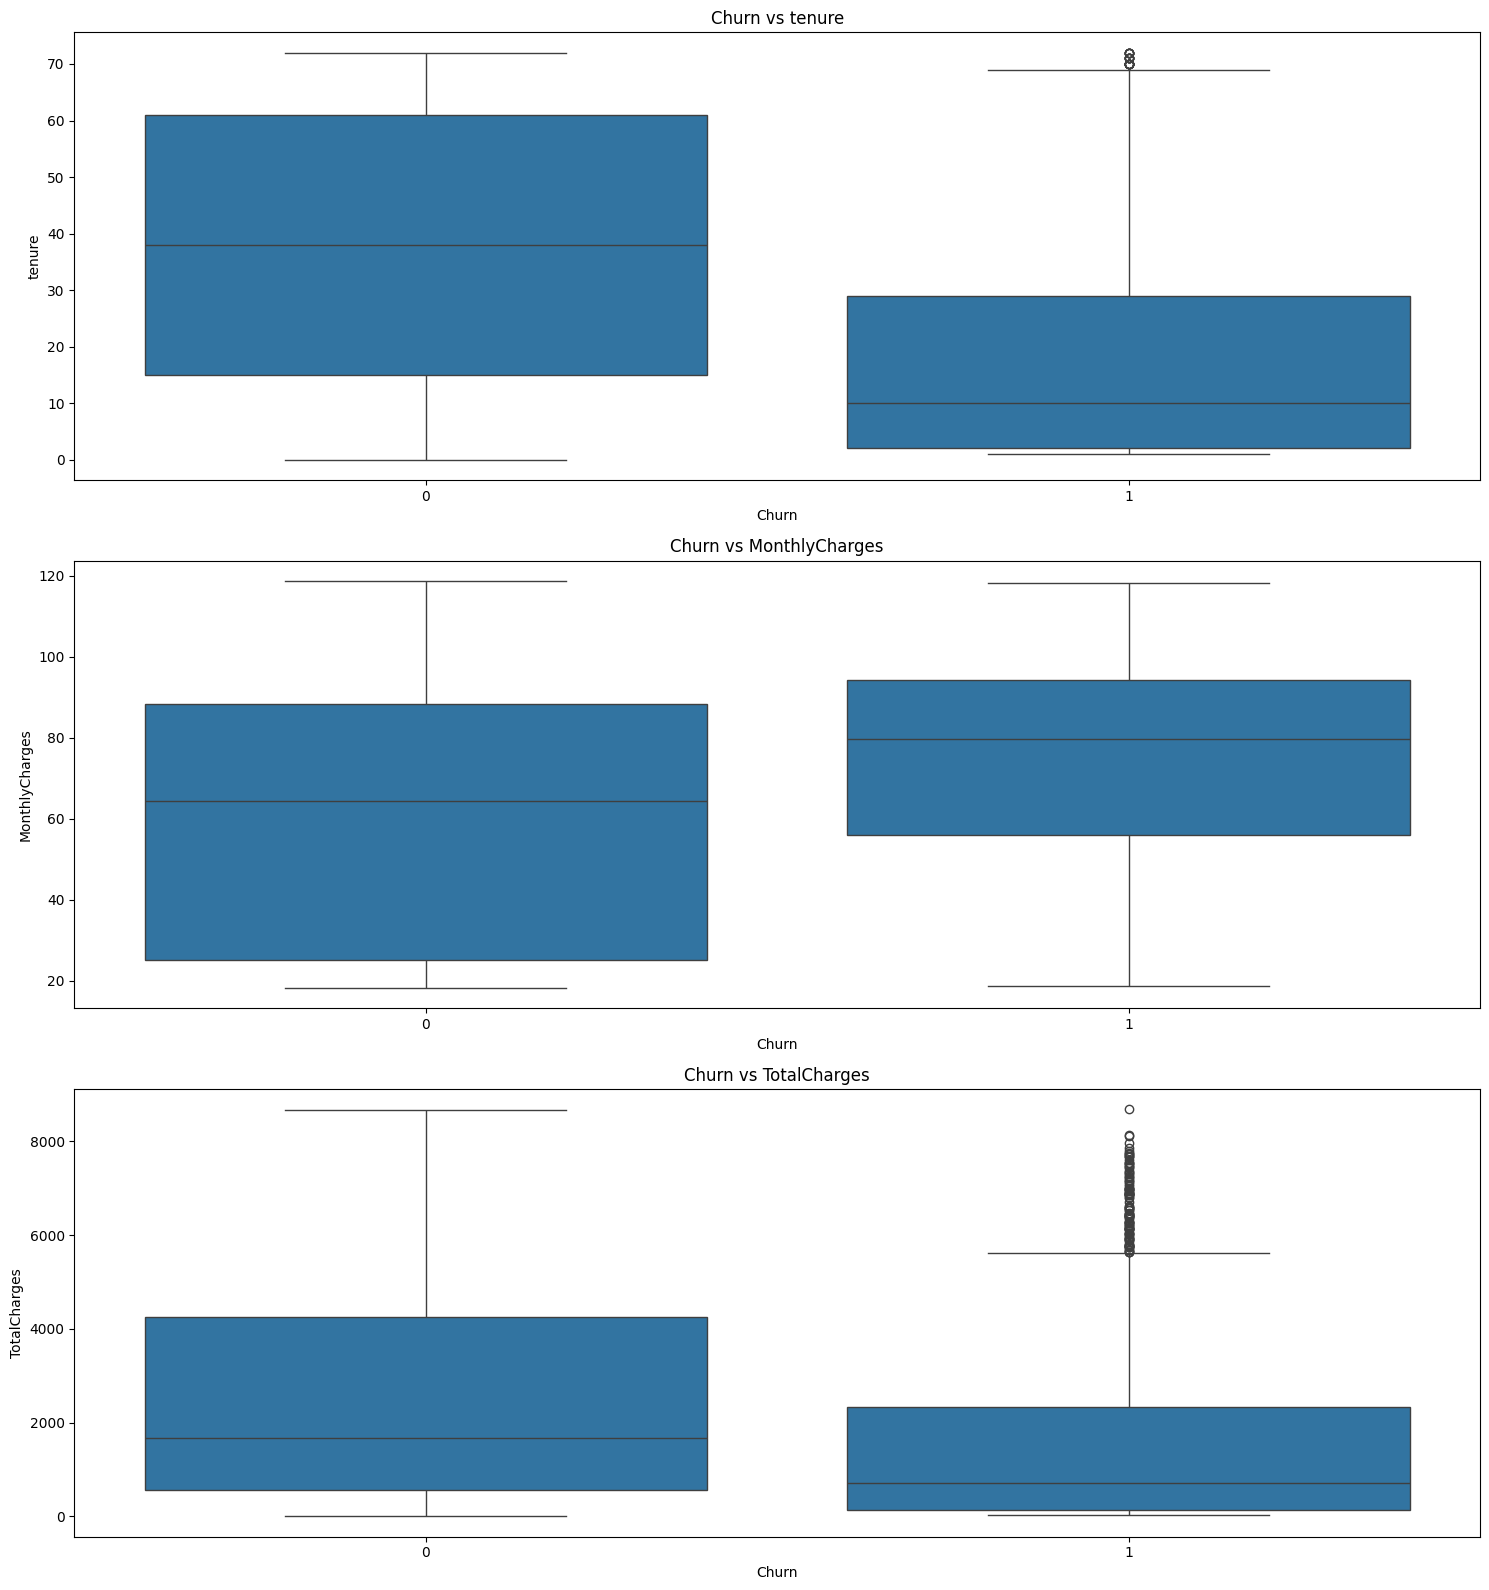

In [13]:
# Box to Box plot of churn and numerical features
num_featuires = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 16))
for i, col in enumerate(num_featuires, 1):
  plt.subplot(len(num_featuires), 1, i)
  sns.boxplot(data=df, x='Churn', y=col)
  plt.title(f'Churn vs {col}')
  plt.tight_layout()
plt.show()


## Numerical Variables Insights vs Churn

1. Churn vs. Tenure:

* Observation: The box plot clearly shows that customers who do not churn (Churn = 0) have a significantly higher median Tenure (number of months with the company) compared to customers who do churn (Churn = 1). The interquartile range (IQR) for non-churning customers is also much wider, indicating a larger spread of long-term customers.

* Implication: Longer tenure is a strong indicator of customer loyalty and reduced churn risk. Customers who churn tend to be newer customers or those who have been with the company for a relatively short period.

* Actionable Insight: Focus retention efforts on newer customers, particularly within their first few months, to establish loyalty and prevent early churn. Implement onboarding programs and early engagement strategies.

2. Churn vs. Monthly Charges:

* Observation: Customers who do churn (Churn = 1) tend to have higher median MonthlyCharges than customers who do not churn (Churn = 0). The distribution for churning customers also appears to be shifted towards higher monthly charges.

* Implication: Customers paying higher monthly fees are more prone to churn. This could indicate dissatisfaction with the value proposition, a perception of being overcharged, or simply being more attractive targets for competitors offering similar services at lower prices.

* Actionable Insight: Analyze the services associated with higher monthly charges for churning customers. Are these premium services? Is the value perceived to be commensurate with the cost? Consider reviewing pricing strategies or offering more competitive bundles for high-value customers.

3. Churn vs. Total Charges:

* Observation: The box plot for TotalCharges reveals that customers who do not churn (Churn = 0) have significantly higher median TotalCharges compared to customers who do churn (Churn = 1). The distribution for non-churning customers extends to much higher total charges, reflecting their longer tenure and accumulated payments. Churning customers tend to have lower total charges, which is consistent with their shorter tenure.

* Implication: This plot reinforces the Tenure observation. Lower TotalCharges for churning customers are a direct consequence of their shorter time with the company. Higher TotalCharges are a natural outcome of sustained customer relationships.

* Actionable Insight: This metric primarily serves as a confirmatory indicator. It underscores the financial impact of losing customers, especially those who would have contributed significantly over time. Focus on extending customer lifetime value by reducing early churn.







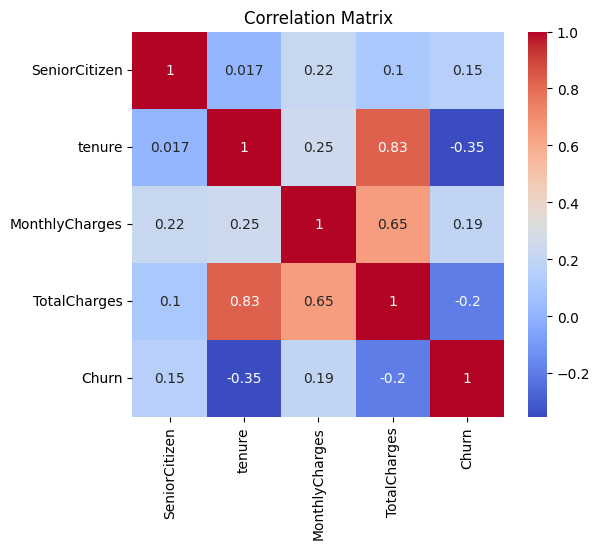

In [ ]:
# Correlation map to assess multicollinearity
df_numeric = df.select_dtypes(include=[np.number]) # selects numeric features
corr_matrix = df_numeric.corr() # creates correlation matrix
# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation and MultiColiinearity

The correlation matrix shows that tenure and TotalCharges have a strong positive correlation (0.83), meaning customers who stay longer generally accumulate higher total charges. Conversely, tenure and Churn have a negative correlation (-0.35), indicating that customers with longer tenure are less likely to churn, which aligns with previous observations.

There is also evidence of multicollinearity, tenure and TotalCharges (0.83): This is a very strong positive correlation. It's expected, as TotalCharges is essentially MonthlyCharges multiplied by tenure (with some nuances for initial charges or pro-rated amounts). This high correlation suggests that these two variables convey very similar information.

MonthlyCharges and TotalCharges (0.65): This is also a strong positive correlation, indicating that higher monthly charges contribute to higher total charges, especially over time.
 Variables like tenure and TotalCharges are providing largely redundant information.

# DATA PREPROCESSING

In [14]:
# Encoding categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [15]:
# select binary and multi-class features
binary_features = [col for col in categorical_features if df[col].nunique() == 2]
multiclass_features = [col for col in categorical_features if df[col].nunique() > 2]

In [16]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in binary_features:
  df[col] = le.fit_transform(df[col])
df[binary_features].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,
7590-VHVEG,0,1,0,0,1
5575-GNVDE,1,0,0,1,0
3668-QPYBK,1,0,0,1,1
7795-CFOCW,1,0,0,0,0
9237-HQITU,0,0,0,1,1


In [17]:
# Encoding multi-class features
df = pd.get_dummies(df, columns=multiclass_features, drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [18]:
# identify boolean columns
bool_columns = df.select_dtypes(include=[bool]).columns
bool_columns

# convert only boolean
df[bool_columns] = df[bool_columns].astype(int)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Feature scaling to ensure consistent value ranges like tenure, Monthly charges, and Total Charges
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns]

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.277445,-1.160323,-0.992611
5575-GNVDE,0.066327,-0.259629,-0.172165
3668-QPYBK,-1.236724,-0.362660,-0.958066
7795-CFOCW,0.514251,-0.746535,-0.193672
9237-HQITU,-1.236724,0.197365,-0.938874
...,...,...,...
6840-RESVB,-0.340876,0.665992,-0.127605
2234-XADUH,1.613701,1.277533,2.242606
4801-JZAZL,-0.870241,-1.168632,-0.852932


Prediction

In [21]:
# Target Variable
y = df['Churn']

x = df.drop('Churn', axis = 1)

In [22]:
# training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Its important to handle the imbalance in the data since No response for Churn is over 70%. Ensures model does not become biased to majority class.

In [28]:
# address imbalances
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [30]:

y_train_resampled.value_counts()

,count
Churn,
0,4138
1,4138


# PREDICTION MODEL PIPELINES

In [31]:
# import
from sklearn.pipeline import Pipeline #streamline preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [32]:
# train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}



In [33]:
# pipelines
for name, model in models.items():
  pipeline = Pipeline([
      ('model', model)
  ])
  pipeline.fit(x_train_resampled, y_train_resampled)
  y_pred = pipeline.predict(x_test)
  print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.65      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.78      0.78      1409


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.65      0.60       373

    accuracy                           0.77      1409
   macro avg   

# Analysis
All three machine learning models: Logistic Regression, Random Forest, and XGBoost—perform well at predicting which customers will not churn (Class 0), which is expected due to the dataset's imbalance. However, their performance in correctly identifying customers who will churn (Class 1) is more complex. The Logistic Regression model demonstrates the highest recall (0.78), meaning it is the best at catching actual churners, though its precision is the lowest.

This makes it the most suitable model if the goal is to intervene and save as many at-risk customers as possible, even at the cost of targeting some who wouldn't have churned anyway. The Random Forest and XGBoost models have slightly better precision but significantly lower recall, indicating they are more accurate in their predictions but will miss a larger number of customers who are truly on the verge of churning.

 Ultimately, the Logistic Regression model is the most suitable since on the business prioritizes catching all potential churners (recall) rather than having more confidence in each individual prediction (precision).